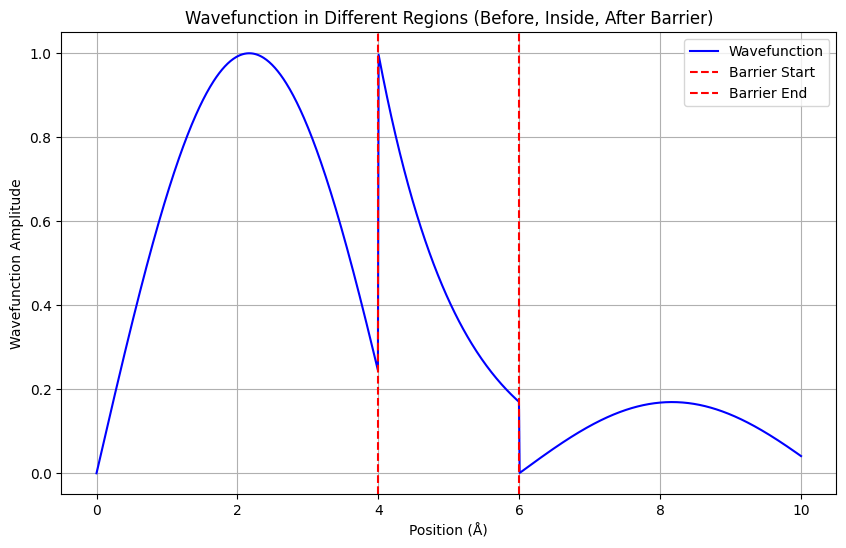

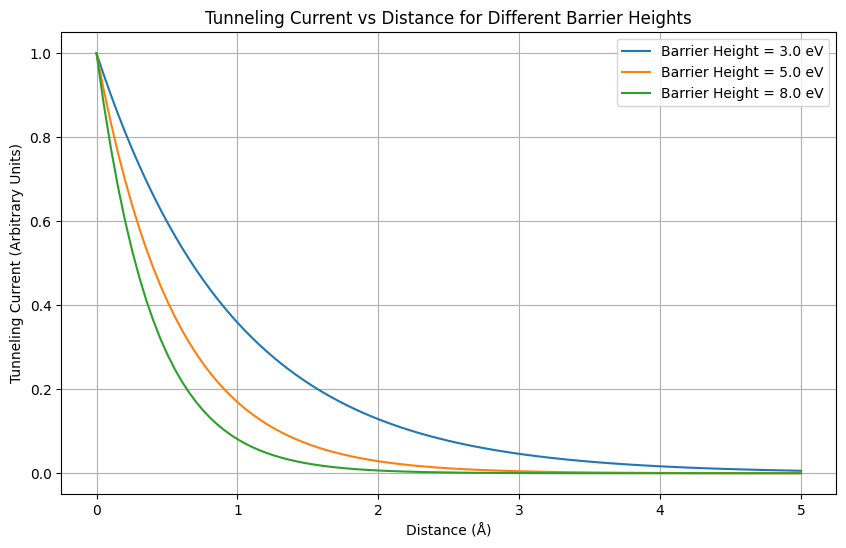

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.054571817e-34  # Reduced Planck's constant (J·s)
m_e = 9.10938356e-31    # Electron mass (kg)
eV_to_J = 1.60218e-19   # 1 eV to joules

# Parameters for the potential barrier
barrier_height = 5 * eV_to_J  # Barrier height in joules
barrier_width = 2e-10         # Barrier width in meters
E = 2 * eV_to_J               # Energy of the particle (in joules)
x = np.linspace(0, 10e-10, 1000)  # Position from 0 to 10 angstroms
k = np.sqrt(2 * m_e * E) / hbar   # Wave number outside the barrier
kappa = np.sqrt(2 * m_e * (barrier_height - E)) / hbar  # Decay constant inside the barrier

# Define wavefunction in three regions
def wavefunction(x):
    psi = np.zeros_like(x)
    for i, xi in enumerate(x):
        if xi < 4e-10:  # Region 1: Before the barrier
            psi[i] = np.sin(k * xi)
        elif 4e-10 <= xi <= (4e-10 + barrier_width):  # Region 2: Inside the barrier
            psi[i] = np.exp(-kappa * (xi - 4e-10))
        else:  # Region 3: After the barrier
            psi[i] = np.exp(-kappa * barrier_width) * np.sin(k * (xi - (4e-10 + barrier_width)))
    return psi

# Compute wavefunction
psi = wavefunction(x)

# Plotting wavefunction
plt.figure(figsize=(10, 6))
plt.plot(x * 1e10, psi, label="Wavefunction", color='blue')
plt.axvline(x=4, color='red', linestyle='--', label='Barrier Start')
plt.axvline(x=4 + barrier_width*1e10, color='red', linestyle='--', label='Barrier End')
plt.title('Wavefunction in Different Regions (Before, Inside, After Barrier)')
plt.xlabel('Position (Å)')
plt.ylabel('Wavefunction Amplitude')
plt.legend()
plt.grid()
plt.show()

# Define tunneling current
def tunneling_current(d, barrier_height):
    # Current decays exponentially with distance and depends on barrier height
    kappa = np.sqrt(2 * m_e * (barrier_height - E)) / hbar
    return np.exp(-2 * kappa * d)

# Distance range (in meters)
d = np.linspace(0, 5e-10, 100)

# Varying barrier heights
barrier_heights = [3 * eV_to_J, 5 * eV_to_J, 8 * eV_to_J]

# Plotting tunneling current vs distance for different barrier heights
plt.figure(figsize=(10, 6))
for bh in barrier_heights:
    current = tunneling_current(d, bh)
    plt.plot(d * 1e10, current, label=f'Barrier Height = {bh/eV_to_J:.1f} eV')

plt.title('Tunneling Current vs Distance for Different Barrier Heights')
plt.xlabel('Distance (Å)')
plt.ylabel('Tunneling Current (Arbitrary Units)')
plt.legend()
plt.grid()
plt.show()
